Load dataset
------------

In [1]:
mnist = require('mnist')

torch.seed()

testset = mnist.testdataset()
testset['data'] = testset['data']:double():clamp(0,1)

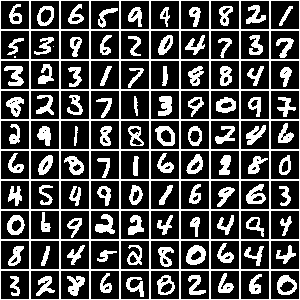

In [2]:
inputs_x = torch.Tensor(100, 28*28)
inputs_y = torch.ByteTensor(100)
for i=1, 100 do
    num = torch.random(testset.size)
    inputs_x[i]:copy(testset[num].x)
    inputs_y[i] = testset[num].y
end

wm = image.toDisplayTensor{
    input=inputs_x:view(torch.LongStorage{100, 28, 28}),
    padding=2, nrow=10}
itorch.image(wm)

Classify
--------

We will forward classification RBM with zero class vector and do one step Gibbs sampling from the input digit. Resulting digit class is stored to the *class_y*.

In [3]:
require('classrbm')

classrbm = torch.load('models/pretrained_rbm_2.dat')

class_y = torch.ByteTensor(100)

for i=1, 100 do
    vt, yt = classrbm:forward{inputs_x[i], torch.zeros(10)}
    _, y = torch.max(yt,1)
    y = y-1 -- because index from 1
    
    class_y[i] = y
end

print(class_y:view(10,10))

 6  0  6  5  9  4  9  8  2  1
 5  3  9  5  3  8  4  7  3  7
 3  2  3  1  7  1  8  8  4  9
 9  2  3  7  1  3  9  0  9  7
 2  4  1  8  8  0  0  2  4  6
 6  0  3  7  1  6  0  1  8  0
 4  5  4  9  0  1  5  9  6  3
 0  6  9  2  2  4  9  4  9  4
 3  1  4  5  2  8  0  6  4  4
 3  2  8  6  9  0  2  6  5  0
[torch.ByteTensor of size 10x10]



Sample new digits
-----------------

It is posible with this architecture http://www.cs.toronto.edu/~hinton/adi.